## q1

In [2]:
## a

import numpy as np
arr = np.arange(12)
reshaped_arr = arr.reshape((3,4))
print(reshaped_arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [3]:
## b
array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
mask = (array>5) & (array%2 ==0)
filtered_array = array[mask]
print(filtered_array)

[ 6  8 10 12]


In [7]:
##c

matrix = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
diagonal_matrix = np.diag(np.diag(matrix))
print("Diagonal matrix:\n", diagonal_matrix)

Diagonal matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 11]]


In [ ]:
##d

matrix = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]])
rows = np.array([0,1,2])
cols = np.array([2,1,0])
selected_elements = matrix[rows,cols]
print("selected elements", selected_elements)

In [10]:
##e

import numpy as np
matrix = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]])
submatrix = matrix[-2:,-2:]
submatrix_sum = np.sum(submatrix)
submatrix_mean = np.mean(submatrix)
print("submatrix:\n", submatrix)
print("submatrix sum:\n", submatrix_sum)
print("submatrix mean:\n", submatrix_mean)

submatrix:
 [[11 12]
 [15 16]]
submatrix sum:
 54
submatrix mean:
 13.5


## q2 a)

In [28]:
def conjugate_gradient(A, b, x0=None, tol=1e-10, max_iter = None):

    n = len(b)
    if(x0 is None):
        x0 = np.zeros(n)
    if(max_iter is None):
        max_iter = n

    x = x0
    r = b - np.dot(A,x) # initial residual
    p = r.copy()
    rs_old = np.dot(r,r)

    for i in range(max_iter):
        alpha_k = np.dot(np.matrix.transpose(r), r)/ np.dot(np.dot(np.matrix.transpose(p),A), p)
        x_new = x - alpha_k * np.matmul(A, p)
        r_new = r - alpha_k*np.dot(A, p)
        res = np.linalg.norm(r_new)

        if(res <= tol):
            print("solution converged...!")
            return x
            
        beta = np.linalg.norm(r_new)/np.linalg.norm(r)
        p_new = r_new + beta*p

        r = r_new
        p = p_new
        x = x_new

    print("solution did not converge...!")
    return None

In [27]:
A = [[4,1,1], [1,3,-1], [1,-1,2]]
b = [1,2,0]

sol = conjugate_gradient(A,b)

solution did not converge...!


## q2 b)

In [35]:
def lu_decomposition(A, b):

    n = len(b)
    L = np.eye(n)
    U = np.zeros((n,n))

    for k in np.arange(0,n):
        for i in np.arange(k,n):
            U[k][i] = A[k][i]

            for j in range(k):
                U[k][i]-= L[k][j]*U[j][i]
        for i in np.arange(k+1,n):
            L[i][k] = A[i][k]

            for j in range(k):
                L[i][k]-= L[i][j]*U[j][k]

            L[i][k] = L[i][k]/U[k][k]
        L[k][k]=1

    y = np.zeros(n)
    x = np.zeros(n)

    for i in range(n):
        y[i] = b[i]

        for j in range(i):
            y[i] -= L[i][j]*y[j]

    for i in range(n):
        x[i] = y[i]

        for j in np.arange(i+1,n):
            x[i] -= U[i,j]*x[j]

        x[i]/= U[i][i]

    return x

In [36]:
A = [[2,-1,1], [-3,3,9],[3,3,5]]
b = [2,15,5]

sol = lu_decomposition(A,b)
sol

array([ 1.        , 12.        ,  1.85714286])

## q3

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = './MID_SEM/mixing.jpg'
image = cv2.imread(image_path)

if len(image.shape) == 3:
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    grayscale_image = image

Mixing Index (η) at Mid-Section (x = 250 µm): 0.8154
Mixing Index (η) at Outlet (x = 500 µm): 0.5763


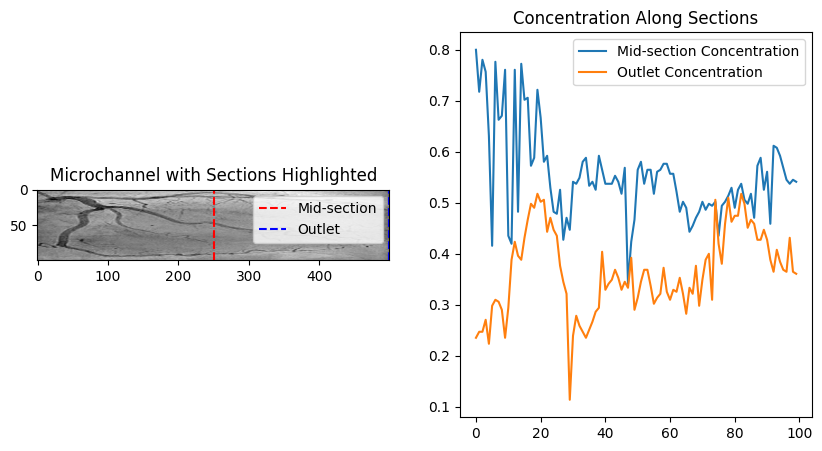

In [12]:
desired_length = 500  
desired_width = 100   

rescaled_image = cv2.resize(grayscale_image, (desired_length, desired_width))

normalized_image = rescaled_image / 255.0

mid_section_x = 250  # In microns (since the length is now 500 pixels)
outlet_x = 500 - 1   # The last column of the resized image

mid_section_column = normalized_image[:, mid_section_x]
outlet_column = normalized_image[:, outlet_x]

c_star = 0.5  # Homogeneous concentration

def calculate_mixing_index(column, c_star):
    N = len(column)  # Number of pixels along the section
    numerator = np.sum((column - c_star) ** 2)
    denominator = np.sum(column ** 2)
    mixing_index = 1 - np.sqrt(numerator / denominator)
    return mixing_index


mixing_index_mid = calculate_mixing_index(mid_section_column, c_star)
mixing_index_outlet = calculate_mixing_index(outlet_column, c_star)


print(f"Mixing Index (η) at Mid-Section (x = 250 µm): {mixing_index_mid:.4f}")
print(f"Mixing Index (η) at Outlet (x = 500 µm): {mixing_index_outlet:.4f}")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normalized_image, cmap='gray')
plt.axvline(x=mid_section_x, color='red', linestyle='--', label='Mid-section')
plt.axvline(x=outlet_x, color='blue', linestyle='--', label='Outlet')
plt.title('Microchannel with Sections Highlighted')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mid_section_column, label='Mid-section Concentration')
plt.plot(outlet_column, label='Outlet Concentration')
plt.title('Concentration Along Sections')
plt.legend()

plt.show()

## q4

In [5]:
def pixel_to_area(pixel_area):
    return pixel_area*0.14*0.14

def area_to_vol(area, A=1.0):
    return area*A

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = './MID_SEM/angiogram.jpg'
image = cv2.imread(image_path)

if len(image.shape) == 3:
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    grayscale_image = image

In [8]:
blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3, 3), np.uint8)
cleaned_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Total Projected Arterial Area: 437.45 mm^2
Total Volume of Arterial Network: 437.45 mm^3


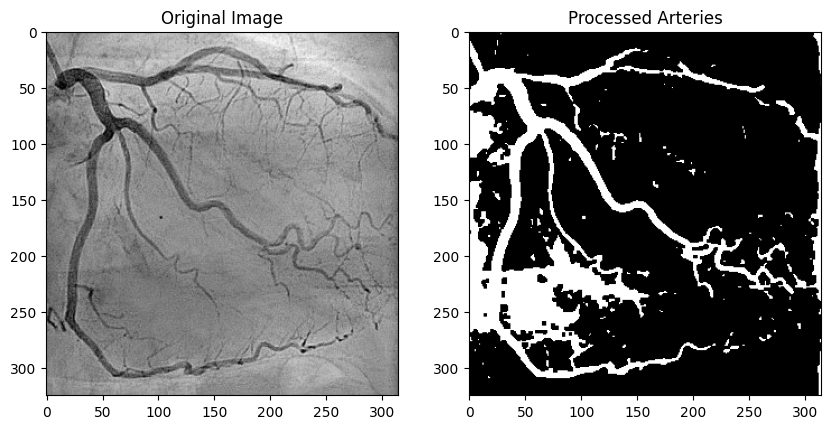

In [9]:
total_area_pixels = 0
for contour in contours:
    total_area_pixels += cv2.contourArea(contour)

total_area_mm2 = pixel_to_area(total_area_pixels)

total_volume = area_to_vol(total_area_mm2)

print(f"Total Projected Arterial Area: {total_area_mm2:.2f} mm^2")
print(f"Total Volume of Arterial Network: {total_volume:.2f} mm^3")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cleaned_image, cmap='gray')
plt.title('Processed Arteries')

plt.show()

## q5

In [14]:
import sympy as sp

In [15]:
tau, epsilon = sp.symbols('tau epsilon')
y = sp.Function('y')(tau)

diffeq = y.diff(tau,2) + 2*epsilon*y.diff(tau) - y
diffeq

2*epsilon*Derivative(y(tau), tau) - y(tau) + Derivative(y(tau), (tau, 2))

In [16]:
y0 = sp.Function('y0')(tau)
y1 = sp.Function('y1')(tau)
y_perturbation = y0 + epsilon*y1

diffeq_sub_expanded = sp.simplify(diffeq.subs(y, y_perturbation).expand())

In [17]:
diffeq_sub_expanded

2*epsilon*(epsilon*Derivative(y1(tau), tau) + Derivative(y0(tau), tau)) - epsilon*y1(tau) + epsilon*Derivative(y1(tau), (tau, 2)) - y0(tau) + Derivative(y0(tau), (tau, 2))

In [18]:
epsilon_expansion = sp.series(diffeq_sub_expanded, epsilon, n=3)

In [19]:
epsilon_expansion

2*epsilon**2*Derivative(y1(tau), tau) + epsilon*(-y1(tau) + 2*Derivative(y0(tau), tau) + Derivative(y1(tau), (tau, 2))) - y0(tau) + Derivative(y0(tau), (tau, 2))

In [20]:
epsilon_zero = -y0 + y0.diff(tau,2)
epsilon_zero

-y0(tau) + Derivative(y0(tau), (tau, 2))

In [21]:
bcs_0 = {
    y0.subs(tau,0):0,
    y0.subs(tau,1):1
}

sol_0 = sp.dsolve(epsilon_zero, ics=bcs_0)
sol_0.rhs

E*exp(tau)/(-1 + exp(2)) - E*exp(-tau)/(-1 + exp(2))

In [22]:
epsilon_one = -y1 + 2*y0.diff(tau,1) + y1.diff(tau,2)
epsilon_one

-y1(tau) + 2*Derivative(y0(tau), tau) + Derivative(y1(tau), (tau, 2))

In [23]:
epsilon_one = sp.simplify(epsilon_one.subs(y0, sol_0.rhs))
epsilon_one

-2*(1 - exp(2*tau))*exp(1 - tau)/(1 - exp(2)) - y1(tau) - 4*exp(2*tau)*exp(1 - tau)/(1 - exp(2)) + Derivative(y1(tau), (tau, 2))

In [24]:
bcs_1 = {
    y1.subs(tau,0):0,
    y1.subs(tau,1):1
}

sol_1 = sp.dsolve(epsilon_one, ics=bcs_1)
sol_1

Eq(y1(tau), (tau/(2*sinh(1)) + (-4*exp(3)*sinh(1) - 1 + 2*E*sinh(1) + exp(2))/(-4*exp(2)*sinh(1) + 2*sinh(1) + 2*exp(4)*sinh(1)))*exp(-tau) + (E*tau/(1 - exp(2)) + (-exp(2) - 2*E*sinh(1) + 1 + 4*exp(3)*sinh(1))/(-4*exp(2)*sinh(1) + 2*sinh(1) + 2*exp(4)*sinh(1)))*exp(tau))

In [25]:
bcs_analytical = {
    y.subs(tau,0):0,
    y.subs(tau,1):1
}
analytical_sol = sp.dsolve(diffeq, ics=bcs_analytical)
analytical_sol

Eq(y(tau), exp(epsilon)*exp(tau*(-epsilon + sqrt(epsilon**2 + 1)))*exp(sqrt(epsilon**2 + 1))/(exp(2*sqrt(epsilon**2 + 1)) - 1) - exp(epsilon)*exp(-tau*(epsilon + sqrt(epsilon**2 + 1)))*exp(sqrt(epsilon**2 + 1))/(exp(2*sqrt(epsilon**2 + 1)) - 1))

In [36]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,50)
y_pert = []
y_analytical = []
eps = 0.00001
for i in t:
    sol_i = sol_1.rhs.subs(tau,i)
    sol_analytical = analytical_sol.rhs.subs(tau,i)
    sol_analytical = sol_analytical.subs(epsilon, eps)
    y_pert.append(sol_i)
    y_analytical.append(sol_analytical)

In [37]:
y_analytical[1]

0.0173668817292030

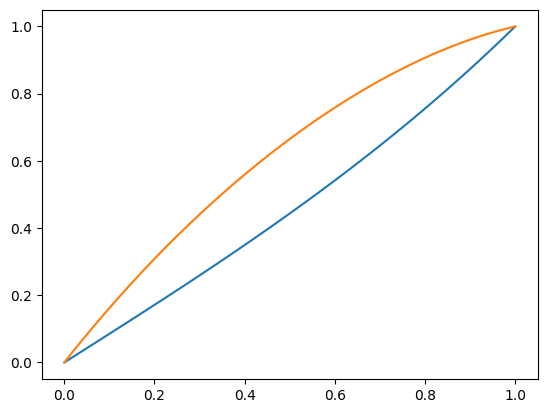

In [38]:
plt.plot(t,y_analytical)
plt.plot(t, y_pert)